# СМО

In [1]:
import simpy
import numpy as np
import math
from functools import reduce
import matplotlib.pyplot as plt

import common

## Тестовая функция

In [2]:
def test_queuing_system(n, m, lambd, mu, v, test_time):
    env = simpy.Environment()
    qs = common.QueuingSystem(n, m, lambd, mu, v, env)
    env.process(common.run_queuing_system(qs, env))
    env.run(until=test_time)
    return qs.t_queuing_system_lst, qs.L_queue_lst, qs.t_queue_lst, qs.L_queuing_system_lst

## Эмпирические характеристики СМО

In [3]:
def get_empirical_characteristic(test_results, n, m, lambd):
    t_queuing_system_lst, L_queue_lst, t_queue_lst , L_queuing_system_lst  = test_results
    p = []
    for i in range(n + m + 1):
        request_frequency = reduce( lambda count, x: count+1 if x == i else count , L_queuing_system_lst, 0)
        p.append(request_frequency / len(L_queuing_system_lst))
    p_reject = p[n + m]
    Q = 1 - p_reject
    A = lambd * Q
    n_occuped = Q * lambd / mu
    L_queue = sum(L_queue_lst) / len(L_queue_lst)
    L_queuing_system = sum(L_queuing_system_lst) / len(L_queuing_system_lst)
    t_queuing_system = sum(t_queuing_system_lst) / len(t_queuing_system_lst)
    t_queue = sum(t_queue_lst) / len(t_queue_lst)
    
    return p, A, p_reject, L_queuing_system, L_queue, t_queuing_system, t_queue, n_occuped

## Теоритические характеристики СМО

In [4]:
def get_theoretical_characteristic(n, m, lambd, mu, v):
    ro = lambd / mu
    betta = v / mu 
    p=[]
    p_0 = (
                 sum([ro ** i / math.factorial(i) for i in range (n+1)]) +
                 ro ** n / math.factorial(n) *
                 sum([ro ** i / reduce( 
                     lambda prod, x: prod * x, [ (n + l * betta) for l in range(1, i + 1) ] 
                 ) for i in range(1,m+1)])
         ) ** (-1)
    p.append(p_0)
    for k in range(1,n + 1):
        p_k = ro ** k / math.factorial(k) * p[0]
        p.append(p_k)
    for i in range(1,m + 1):
        p_n_i = p[n] * ro ** i / reduce( 
                     lambda prod, x: prod * x, [ (n + l * betta) for l in range(1,i + 1) ] 
                 )
        p.append(p_n_i)
    p_reject = p[n + m]
    Q = 1 - p_reject
    A = lambd * Q
    L_queue = sum([ i * p[n + i] for i in range(1,m + 1)])
    n_occuped = Q * lambd / mu
    L_queuing_system = sum([k * p[k] for k in range(1, n + 1)]) + sum([(n + i) * p[n + i] for i in range(1, m + 1)])
    t_queuing_system = L_queuing_system / lambd
    t_queue = L_queue / lambd
    
    return p, A, p_reject, L_queuing_system, L_queue, t_queuing_system, t_queue, n_occuped

## Тесты

### Тест №1
n=2, m=2, $\lambda$=2, $\mu$=1, v=1

Теоритическое p0:  0.14285714285714285
Теоритическое p1:  0.2857142857142857
Теоритическое p2:  0.2857142857142857
Теоритическое p3:  0.19047619047619047
Теоритическое p4:  0.09523809523809523
Теоритическое A (абсолютная пропускная способность):  1.8095238095238095
Теоритическое p отказа:  0.09523809523809523
Теоритическое L СМО (среднее число заявок в СМО):  1.8095238095238093
Теоритическое L очереди (среднее число заявок в очереди):  0.38095238095238093
Теоритическое t СМО (среднее время пребывания заявки в СМО):  0.9047619047619047
Теоритическое t очереди (среднее время пребывания заявки в очереди):  0.19047619047619047
Теоритическое n занятости (среднее число занятых каналов):  1.8095238095238095

Эмпирическое p0:  0.13632943772884587
Эмпирическое p1:  0.27270903345538444
Эмпирическое p2:  0.27270903345538444
Эмпирическое p3:  0.1751517279430205
Эмпирическое p4:  0.0912373978030797
Эмпирическое A (абсолютная пропускная способность):  1.8175252043938406
Эмпирическое p отказа:  0.091

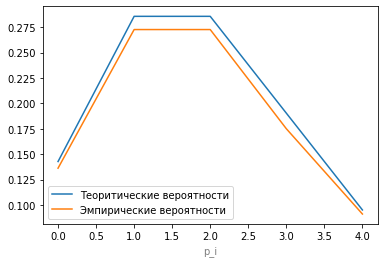

In [5]:
n = 2
m = 2
lambd = 2
mu = 1
v = 1

theoretical_characteristic = get_theoretical_characteristic(n, m, lambd, mu, v)

test_results = test_queuing_system(n, m, lambd, mu, v, 10000)
empirical_characteristic = get_empirical_characteristic(test_results, n, m, lambd)

common.display(theoretical_characteristic, 'Теоритическое')
common.display(empirical_characteristic, 'Эмпирическое')

t_estimation_lst = theoretical_characteristic[0] + [
    theoretical_characteristic[i] for i in range(1, len(theoretical_characteristic))
]
e_estimation_lst = empirical_characteristic[0] + [
    empirical_characteristic[i] for i in range(1, len(empirical_characteristic))
]

chi2_estimation = common.get_xi_2(e_estimation_lst, t_estimation_lst)
print('Тест хи-квадрат:', chi2_estimation)

common.p_graph(theoretical_characteristic, empirical_characteristic)

### Тест №2
n=3, m=3, $\lambda$=5, $\mu$=2, v=2

Теоритическое p0:  0.08326632393997165
Теоритическое p1:  0.2081658098499291
Теоритическое p2:  0.26020726231241137
Теоритическое p3:  0.21683938526034283
Теоритическое p4:  0.13552461578771427
Теоритическое p5:  0.06776230789385713
Теоритическое p6:  0.028234294955773804
Теоритическое A (абсолютная пропускная способность):  4.858828525221131
Теоритическое p отказа:  0.028234294955773804
Теоритическое L СМО (среднее число заявок в СМО):  2.4294142626105657
Теоритическое L очереди (среднее число заявок в очереди):  0.35575211644274995
Теоритическое t СМО (среднее время пребывания заявки в СМО):  0.48588285252211316
Теоритическое t очереди (среднее время пребывания заявки в очереди):  0.07115042328855
Теоритическое n занятости (среднее число занятых каналов):  2.4294142626105657

Эмпирическое p0:  0.08253169651841417
Эмпирическое p1:  0.20380358220970013
Эмпирическое p2:  0.26033407124169855
Эмпирическое p3:  0.2135238478567116
Эмпирическое p4:  0.13219963775407526
Эмпирическое p5:  0.06

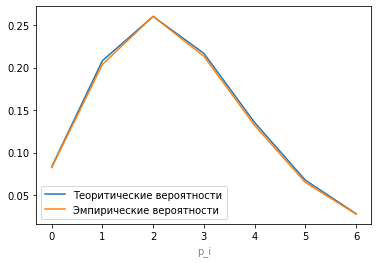

In [6]:
n = 3
m = 3
lambd = 5
mu = 2
v = 2

theoretical_characteristic = get_theoretical_characteristic(n, m, lambd, mu, v)

test_results = test_queuing_system(n, m, lambd, mu, v, 10000)
empirical_characteristic = get_empirical_characteristic(test_results, n, m, lambd)

common.display(theoretical_characteristic, 'Теоритическое')
common.display(empirical_characteristic, 'Эмпирическое')

t_estimation_lst = theoretical_characteristic[0] + [
    theoretical_characteristic[i] for i in range(1, len(theoretical_characteristic))
]
e_estimation_lst = empirical_characteristic[0] + [
    empirical_characteristic[i] for i in range(1, len(empirical_characteristic))
]

chi2_estimation = common.get_xi_2(e_estimation_lst, t_estimation_lst)
print('Тест хи-квадрат:', chi2_estimation)

common.p_graph(theoretical_characteristic, empirical_characteristic)

### Тест №3
n=7, m=5, $\lambda$=12, $\mu$=3, v=3

Теоритическая p0:  0.01832065355981921
Теоритическая p1:  0.07328261423927684
Теоритическая p2:  0.1465652284785537
Теоритическая p3:  0.19542030463807158
Теоритическая p4:  0.19542030463807158
Теоритическая p5:  0.15633624371045726
Теоритическая p6:  0.10422416247363818
Теоритическая p7:  0.059556664270650386
Теоритическая p8:  0.029778332135325193
Теоритическая p9:  0.013234814282366753
Теоритическая p10:  0.005293925712946701
Теоритическая p11:  0.0019250638956169821
Теоритическая p12:  0.0006416879652056607
Теоритическая A (абсолютная пропускная способность):  11.992299744417531
Теоритическая p отказа:  0.0006416879652056607
Теоритическая L СМО (среднее число заявок в СМО):  3.997433248139178
Теоритическая L очереди (среднее число заявок в очереди):  0.08303843324739504
Теоритическая t СМО (среднее время пребывания заявки в СМО):  0.3331194373449315
Теоритическая t очереди (среднее время пребывания заявки в очереди):  0.00691986943728292
Теоритическая n занятости (среднее число зан

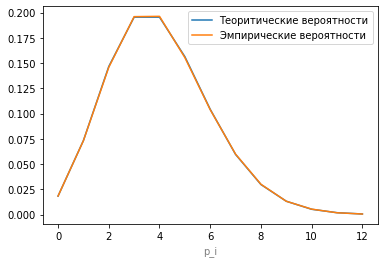

In [7]:
n = 7
m = 5
lambd = 12
mu = 3
v = 3

theoretical_characteristic = get_theoretical_characteristic(n, m, lambd, mu, v)

test_results = test_queuing_system(n, m, lambd, mu, v, 10000)
empirical_characteristic = get_empirical_characteristic(test_results, n, m, lambd)

common.display(theoretical_characteristic, 'Теоритическая')
common.display(empirical_characteristic, 'Эмпирическая')

t_estimation_lst = theoretical_characteristic[0] + [
    theoretical_characteristic[i] for i in range(1, len(theoretical_characteristic))
]
e_estimation_lst = empirical_characteristic[0] + [
    empirical_characteristic[i] for i in range(1, len(empirical_characteristic))
]

chi2_estimation = common.get_xi_2(e_estimation_lst, t_estimation_lst)
print('Тест хи-квадрат:', chi2_estimation)

common.p_graph(theoretical_characteristic, empirical_characteristic)

## Графики, показывающие формирование устойчивого состояния в СМО
Черная линия это теоритическое значение $p_{i}$

n=2, m=1, $\lambda$=1, $\mu$=1, v=1

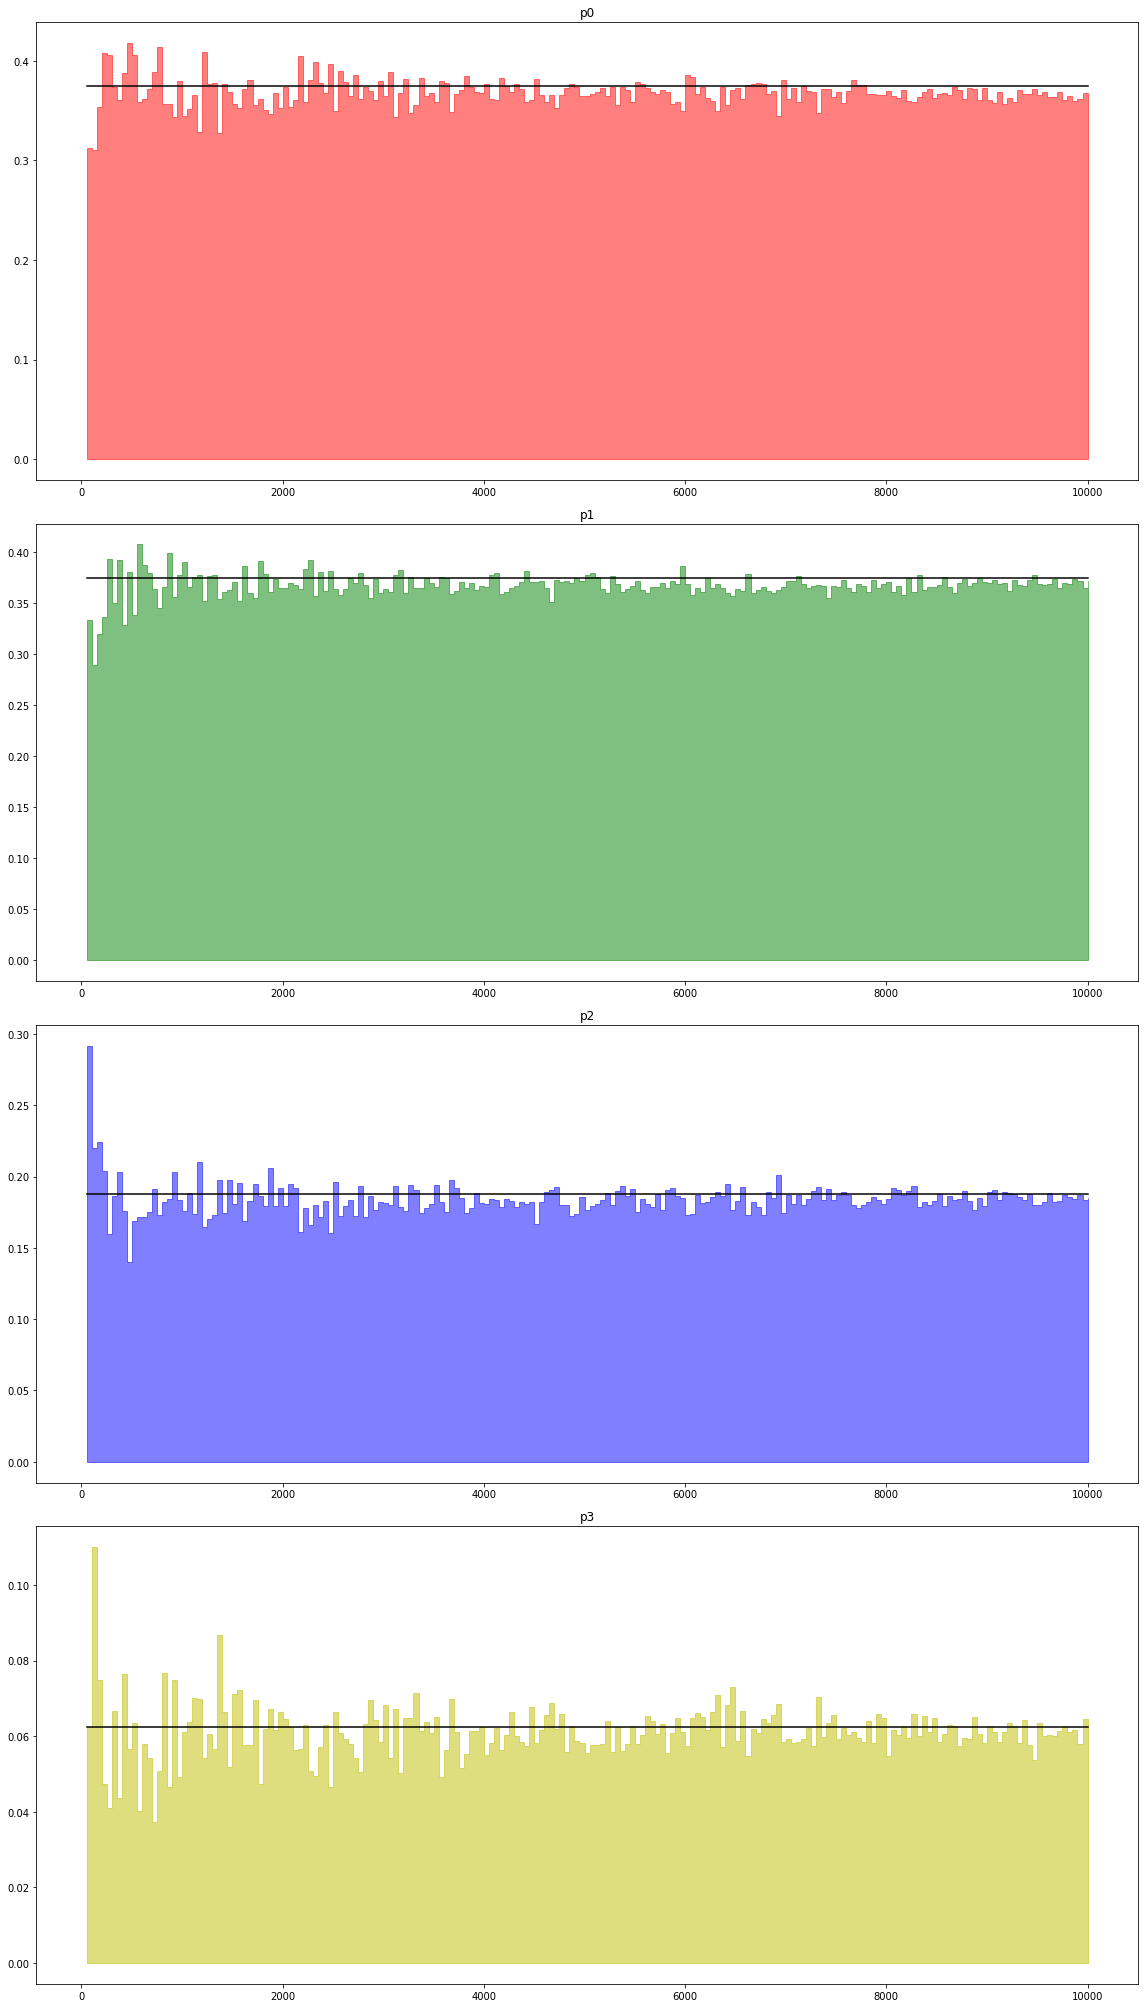

In [8]:
n = 2
m = 1
lambd = 1
mu = 1
v = 1

times = [i * 50 for i in range(1,201)]

p0, p1, p2, p3 = [],[],[],[]
for time in times:
    test_results = test_queuing_system(n, m, lambd, mu, v, time)
    empirical_characteristic = get_empirical_characteristic(test_results, n, m, lambd)
    p0.append(empirical_characteristic[0][0])
    p1.append(empirical_characteristic[0][1])
    p2.append(empirical_characteristic[0][2])
    p3.append(empirical_characteristic[0][3])

p_theoretical = get_theoretical_characteristic(n, m, lambd, mu, v)[0]

fig, (ax0, ax1, ax2, ax3) = plt.subplots(ncols=1, nrows=4, figsize=(16, 28), 
                                         gridspec_kw={'height_ratios': [1, 1, 1, 1], 'width_ratios': [1]}
                                        )
x = np.linspace(0, 10, 10000)

ax0.set_title('p0')
ax0.plot(times, [p_theoretical[0]]*len(times), '-k')
ax0.fill_between(times, y1=p0, color='r', step='post', alpha=0.5)

ax1.set_title('p1')
ax1.plot(times, [p_theoretical[1]]*len(times), '-k')
ax1.fill_between(times, y1=p1, color='g', step='post', alpha=0.5)

ax2.set_title('p2')
ax2.plot(times, [p_theoretical[2]]*len(times), '-k')
ax2.fill_between(times, y1=p2, color='b', step='post', alpha=0.5)

ax3.set_title('p3')
ax3.plot(times, [p_theoretical[3]]*len(times), '-k')
ax3.fill_between(times, y1=p3, color='y', step='post', alpha=0.5)

fig.tight_layout()